This notebook is experimental,  
it is as a base to test the code and to convert it to the `create_data.py` script.

#### create mock reference and test data

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs # for generating synthetic data
from sklearn.cluster import KMeans # clustering algorithm

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [ ]:
RSEED = 42 # random seed for reproducibility
C = 3 # number of clusters

In [5]:
# Create synthetic data
# Using make_blobs to generate synthetic data with 10 features and 3 centers
# This will create a dataset suitable for clustering, with some noise added
# to simulate real-world data variability.
X, y, centroids = make_blobs(n_samples=500, n_features=10, centers=C, cluster_std=2, center_box=(-10.0, 10.0), random_state=RSEED, return_centers=True)

In [17]:
# reference centroids
centroids

array([[-2.50919762,  9.01428613,  4.63987884,  1.97316968, -6.87962719,
        -6.88010959, -8.83832776,  7.32352292,  2.02230023,  4.16145156],
       [-9.58831011,  9.39819704,  6.64885282, -5.75321779, -6.36350066,
        -6.3319098 , -3.91515514,  0.49512863, -1.36109963, -4.1754172 ],
       [ 2.23705789, -7.21012279, -4.15710703, -2.67276313, -0.87860032,
         5.70351923, -6.00652436,  0.28468877,  1.84829138, -9.07099175]])

In [18]:
# test dataset with centroid initialization
# known centroids ensure that the clustering algorithm can find the same clusters

X1, y1 = make_blobs(n_samples=500, n_features=10, centers=centroids, cluster_std=3.5, center_box=(-10.0, 10.0), random_state=RSEED)

In [19]:
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df2 = pd.DataFrame(X1, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])

In [ ]:
df.to_csv("../data/ref_data.csv", index=False)
df2.to_csv("../data/test_data.csv", index=False)

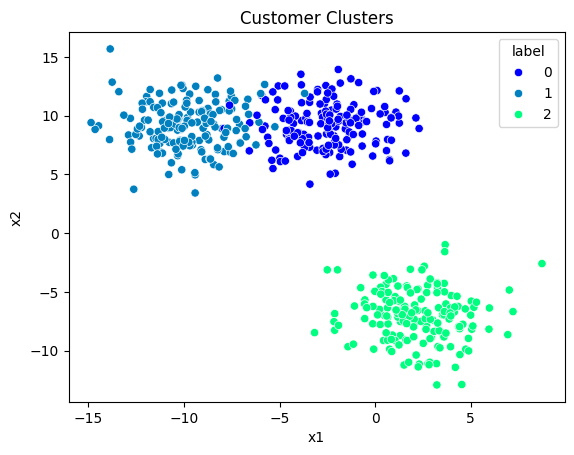

In [20]:
# Create a DataFrame for plotting
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df['label'] = y

# Plot using seaborn
sns.scatterplot(data=df, x='x1', y='x2', hue='label', palette='winter')
plt.title('Customer Clusters')
plt.show()

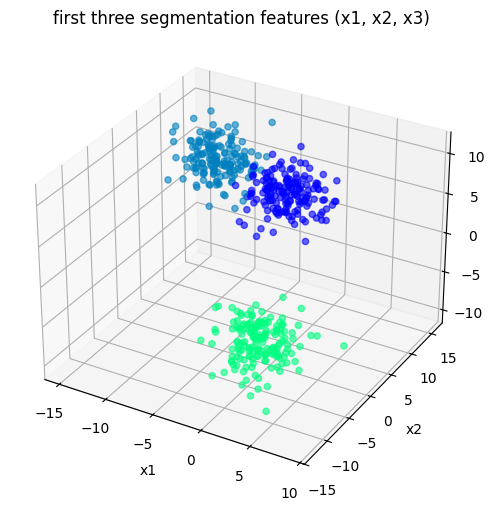

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['x1'], df['x2'], df['x3'], c=df['label'], cmap='winter', alpha=0.6)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('first three segmentation features (x1, x2, x3)')
# plt.legend(*scatter.legend_elements(), title="Label")
plt.show()

In [ ]:
# save the labeled data to a CSV file
df.to_csv('../data/customer_clusters.csv', index=False)

In [23]:
# re-read the data to verify
df = pd.read_csv('../data/customer_clusters.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,label
0,1.613810,11.431019,6.688004,3.158224,-5.322905,-7.982481,-10.474726,7.316774,1.681931,3.254995,0
1,-11.949936,11.626840,8.079615,-4.316846,-5.486549,-6.292676,-2.569433,1.678757,-2.069181,-5.322621,1
2,-7.504861,10.565286,6.389818,-4.593503,-7.777286,-4.620798,-0.616193,2.636350,-2.820305,-3.452583,1
3,-1.997138,10.979668,7.970828,4.001910,-10.561376,-9.439264,-10.087965,7.375705,3.057618,2.709964,0
4,-7.891962,6.933150,7.753453,-4.501956,-7.757044,-5.167857,-3.394271,-0.582555,-3.378209,-8.100669,1


In [ ]:
# make it features-only again
df_features = df.drop(columns='label')

In [25]:
df_features.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.613810,11.431019,6.688004,3.158224,-5.322905,-7.982481,-10.474726,7.316774,1.681931,3.254995
1,-11.949936,11.626840,8.079615,-4.316846,-5.486549,-6.292676,-2.569433,1.678757,-2.069181,-5.322621
2,-7.504861,10.565286,6.389818,-4.593503,-7.777286,-4.620798,-0.616193,2.636350,-2.820305,-3.452583
3,-1.997138,10.979668,7.970828,4.001910,-10.561376,-9.439264,-10.087965,7.375705,3.057618,2.709964
4,-7.891962,6.933150,7.753453,-4.501956,-7.757044,-5.167857,-3.394271,-0.582555,-3.378209,-8.100669


#### modeling

In [12]:
# Initialize KMeans model
model = KMeans(n_clusters=C, random_state=RSEED)

In [27]:
# Fit the model to the features
# This will cluster the data into C clusters based on the features
# The model will learn the centroids of these clusters
# The model can then be used to predict the cluster labels for new data 
model.fit(df_features)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# save the model to a file
with open('../data/kmeans_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [28]:
model.labels_

array([2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1,
       2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2,

In [29]:
df_features['new_label'] = model.labels_

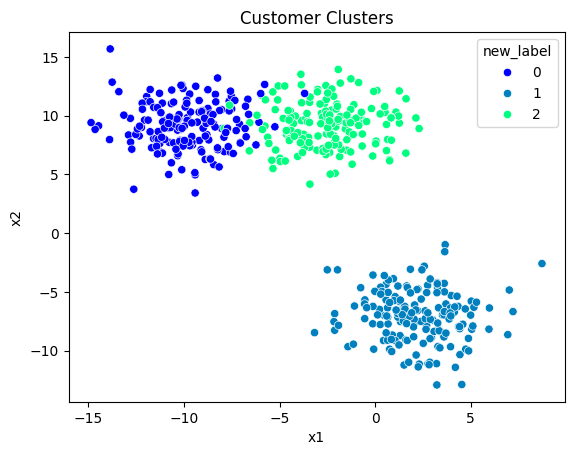

In [30]:
# Create a DataFrame for plotting
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df['label'] = y

# Plot using seaborn
sns.scatterplot(data=df, x='x1', y='x2', hue=df_features['new_label'], palette='winter')
plt.title('Customer Clusters')
plt.show()

#### add timestamp

In [ ]:
df_features.head()

In [ ]:
df_features['date'] = pd.to_datetime('2025-06-01')

In [ ]:
df_features.head()

In [ ]:
cols = df_features.columns.tolist()
cols = cols[-1:] + cols[:-1]  # Move 'date' to the front
cols